# ASTR 596: The Final

#### Three questions, each worth a third of your grade. (I'll make one 34 pts to get to an even 100). Each is designed to test an area where I think the class as a whole is less comfortable. They are sorted by my assesment of difficulty from easiest to hardest. 
#### i.e. the last is probably going to be non-trivial, because well I like Gaussian distributions of grades. 
#### That's OK because the points and grades don't matter!

#### Remember, you can work together, discuss problems and solutions, but you have to write up your own solution. I'd strongly suggest doing that, ideally with some divide and conquer strategy.

### Q1. Using unsupervised learning to work with galaxies

The following query will select 20k likely galaxies from the SDSS database and return the results of that query into an `astropy Table`.  (For now, if you are not familiar with the SDSS DB schema, don't worry about this query, just know that it returns a bunch of photometric features.)

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
!pip install astroquery
from astroquery.sdss import SDSS  # enables direct queries to the SDSS database

GALquery = """SELECT TOP 20000 
         p.dered_u - p.dered_g as ug, p.dered_g - p.dered_r as gr, 
         p.dered_g - p.dered_i as gi, p.dered_g - p.dered_z as gz,             
         p.petroRad_i, p.petroR50_i, p.deVAB_i, p.fracDev_i
         FROM PhotoObjAll AS p JOIN specObjAll s ON s.bestobjid = p.objid
         WHERE p.mode = 1 AND s.sciencePrimary = 1 AND p.clean = 1 AND p.type = 3
         AND p.deVAB_i > -999 AND p.petroRad_i > -999 AND p.petroR50_i > -999 AND p.dered_r < 20
           """
SDSSgals = SDSS.query_sql(GALquery)
SDSSgals

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 41.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.9/887.9 kB 54.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.4/48.4 kB 6.6 MB/s eta 0:00:00


ug,gr,gi,gz,petroRad_i,petroR50_i,deVAB_i,fracDev_i
float64,float64,float64,float64,float64,float64,float64,float64
1.999718,0.9592915,1.370582,1.692535,5.454633,2.344662,0.8708095,1.0
1.98884,0.9332962,1.361919,1.668918,5.177937,2.424093,0.9946066,0.8865207
1.020407,1.601521,2.396175,2.827263,5.846272,1.158836,0.6898293,1.0
1.83742,1.211882,1.688545,1.989878,7.145427,2.795447,0.7493948,1.0
4.55904,1.536175,2.29286,2.712597,4.741546,2.09032,0.5173162,0.8244159
4.532835,1.433081,2.251518,2.669952,8.930706,1.656738,0.6116931,1.0
2.075247,1.267462,1.746914,2.053957,5.091534,2.249913,0.6196061,1.0
1.677757,1.102043,1.582317,1.902397,6.5472,2.809995,0.8713289,0.9118057
1.858603,0.9054127,1.364218,1.661177,6.641626,2.84336,0.4171,1.0


### 1a - Visualize the dataset in g-i (y) vs u-g (x) and all the features (11 pts). 

The bluest galaxies are star-forming galaxies at low redshift 𝑧. The "tight" cluster of red galaxies are passive galaxies at low-𝑧. Finally the diffuse cloud at 𝑔−𝑖≈3 are high-𝑧 luminous red galaxies (LRGs) that were targeted for BAO measurements. These sources have a wide range of 𝑢−𝑔 colors because they essentially are not detected in the 𝑢 band as this is blueward of the Lyman break.

Plot and examine each of the features in this data set using seaborn's `PairGrid`. Overlay a histogram and kernel density distribution (KDE) on each 1D and 2D plot. You should be able to roughly see the different groups of galaxies, but how to separate them?

/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:1185: UserWarning: The following kwargs were not used by contour: 'c'
  cset = contour_func(
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:1185: UserWarning: The following kwargs were not used by contour: 'c'
  cset = contour_func(
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:1185: UserWarning: The following kwargs were not used by contour: 'c'
  cset = contour_func(
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:1185: UserWarning: The following kwargs were not used by contour: 'c'
  cset = contour_func(
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:1185: UserWarning: The following kwargs were not used by contour: 'c'
  cset = contour_func(
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:1185: UserWarning: The following kwargs were not used by contour: 'c'
  cset = contour_func(
/usr/local/lib/python3.10/dist-packages/seaborn/dist

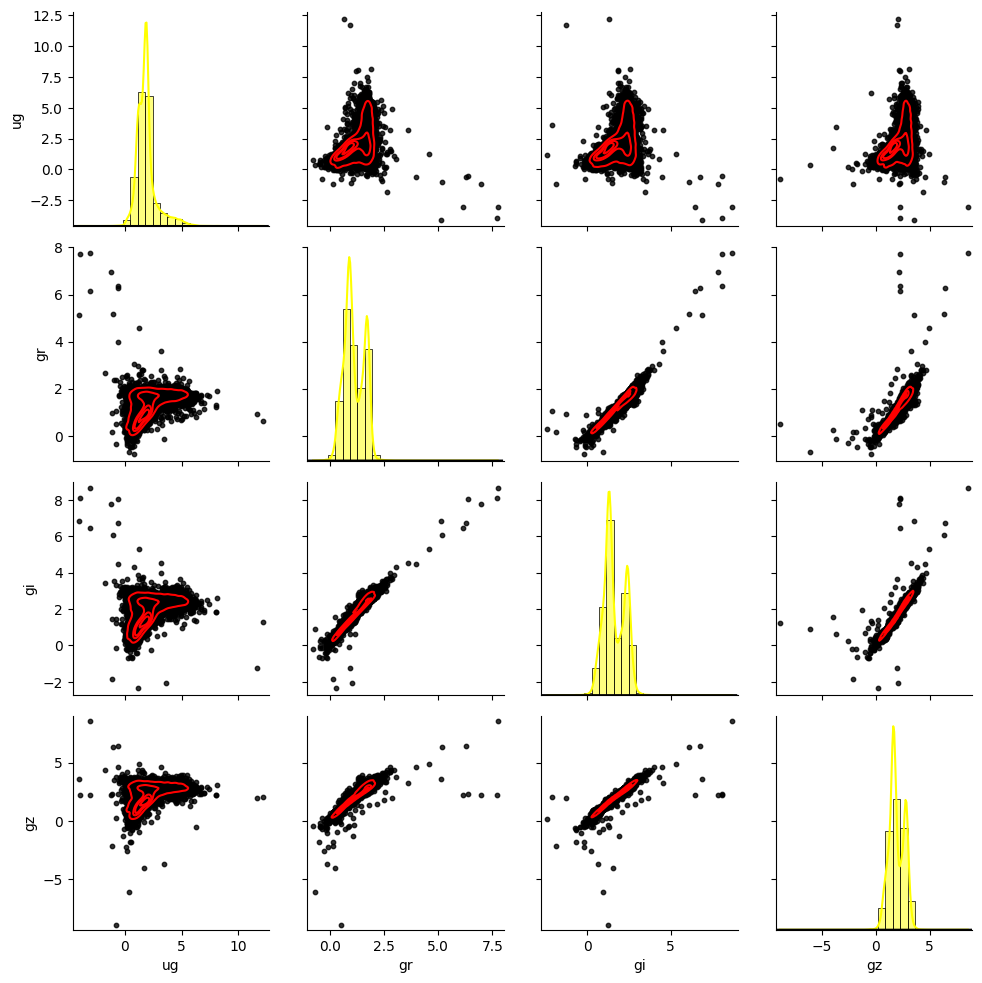

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd

df = SDSSgals.to_pandas()

# remove bad outliers

df = df.drop(df[df['ug'] < -20].index)
df = df.drop(df[df['gr'] < -20].index)
df = df.drop(df[df['gi'] < -20].index)
df = df.drop(df[df['gz'] < -20].index)

# now plot data -- not sure if we want all features, 
# or just the color features, so i just plotted color...

g = sns.PairGrid(df, diag_sharey=False, vars=['ug', 'gr', 'gi', 'gz'])
g.map_diag(sns.histplot, kde=True, color='yellow', bins=25)
g.map_diag(sns.kdeplot, color='black')
g.map_offdiag(plt.scatter, alpha=0.8, s=10, color='black')
g.map_offdiag(sns.kdeplot, c='red', levels=5)

plt.show()

### 1b - Separating the galaxy types (11 pts) 

Using K-means from `sklearn` with n=3, separate the three clusters of galaxies. Initial guesses, hyper-paramter tuning, dimensionality reduction etc are your choices. What's important is to be able to justify them. To the referee, to me, to yourself. We'll do that in the next part. 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


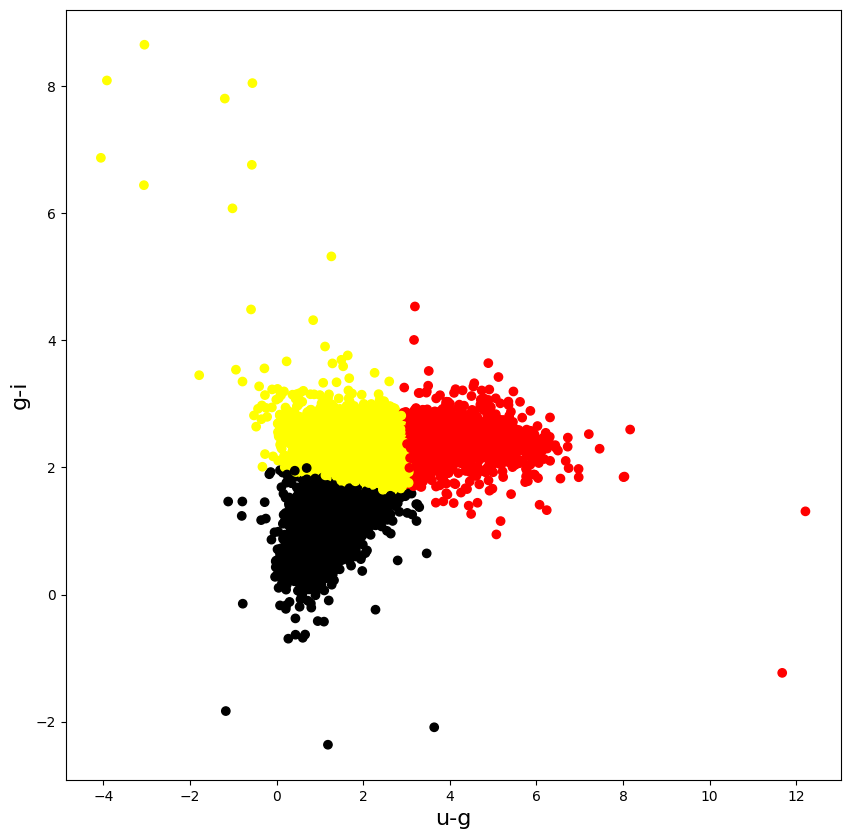

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)

X = df[['ug', 'gr', 'gi', 'gz']] # Why do I pick these? Well, because I'm a brute, and this was the
                                 # simplest model I could think of. My justification is that the 
                                 # clustering looks pretty good after only using the colors.
kmeans.fit(X)
labels = kmeans.labels_

cs = ['black', 'red', 'yellow']
colors = [cs[n] for n in labels]

plt.figure(figsize=[10,10])
plt.scatter(df.ug, df.gi, c=colors)

plt.xlabel('u-g', size=16)
plt.ylabel('g-i', size=16)

plt.show()

# looks nice! clearly see the three groups alluded to in the problem.

### 1c - Working with the distributions (11 pts)
Repeat 1a, but using the results of K-means in 1b to create separately colored distributions for your different classes of galaxies. Use the KDE to provide the mean values of each feature and their standard deviation (hint - these are integrals), and compare them to the sample means and standard deviations. 

In [ ]:
cluster0 = X[labels==0]
cluster1 = X[labels==1]
cluster2 = X[labels==2]

X_clustered = pd.concat([X, pd.DataFrame(labels, columns=['labels'])], axis=1)

/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:1185: UserWarning: The following kwargs were not used by contour: 'c'
  cset = contour_func(
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:1185: UserWarning: The following kwargs were not used by contour: 'c'
  cset = contour_func(
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:1185: UserWarning: The following kwargs were not used by contour: 'c'
  cset = contour_func(
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:1185: UserWarning: The following kwargs were not used by contour: 'c'
  cset = contour_func(
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:1185: UserWarning: The following kwargs were not used by contour: 'c'
  cset = contour_func(
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:1185: UserWarning: The following kwargs were not used by contour: 'c'
  cset = contour_func(
/usr/local/lib/python3.10/dist-packages/seaborn/dist

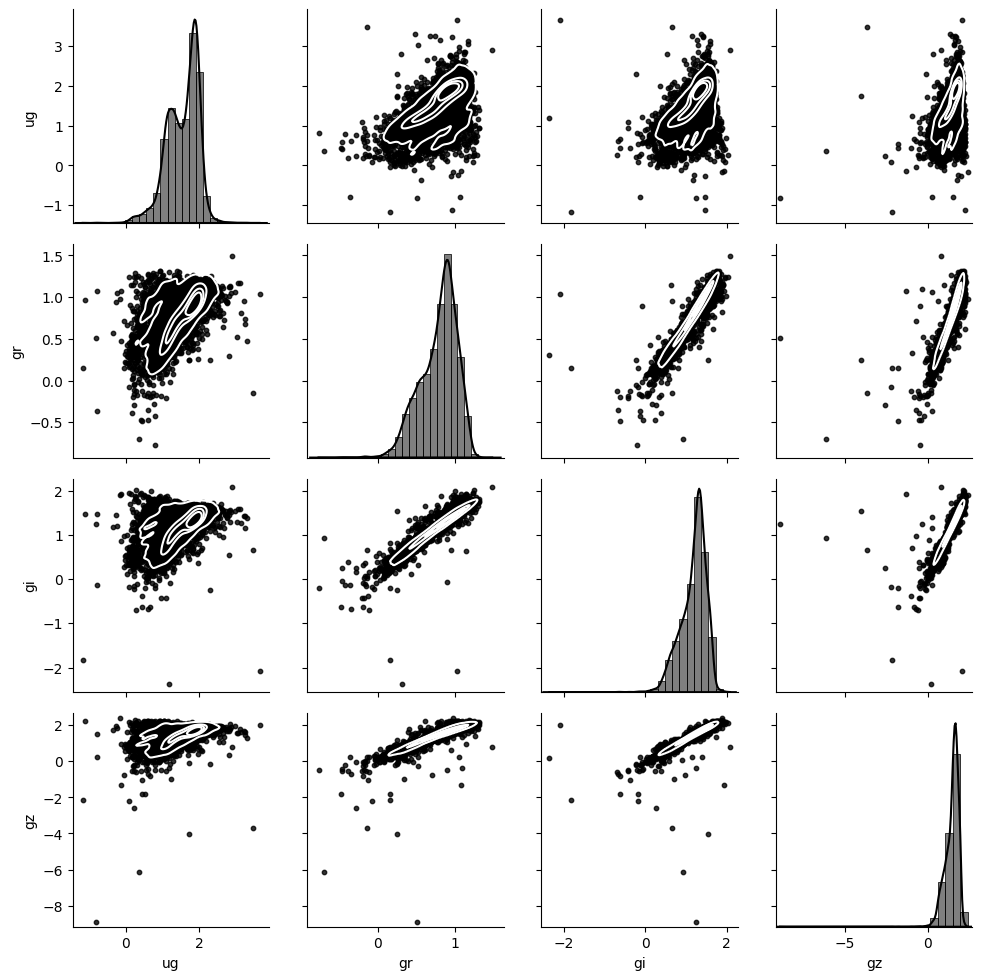

In [ ]:
# First class of galaxies

from scipy.stats import gaussian_kde

C0 = sns.PairGrid(cluster0, diag_sharey=False)
C0.map_diag(sns.histplot, kde=True, color='black', bins=25)
C0.map_diag(sns.kdeplot, color='black')
C0.map_offdiag(plt.scatter, alpha=0.8, s=10, color='black')
C0.map_offdiag(sns.kdeplot, c='white', levels=5)
plt.show()

kde_ug0 = gaussian_kde(cluster0.ug)
kde_gr0 = gaussian_kde(cluster0.gr)
kde_gi0 = gaussian_kde(cluster0.gi)
kde_gz0 = gaussian_kde(cluster0.gz)

/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:1185: UserWarning: The following kwargs were not used by contour: 'c'
  cset = contour_func(
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:1185: UserWarning: The following kwargs were not used by contour: 'c'
  cset = contour_func(
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:1185: UserWarning: The following kwargs were not used by contour: 'c'
  cset = contour_func(
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:1185: UserWarning: The following kwargs were not used by contour: 'c'
  cset = contour_func(
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:1185: UserWarning: The following kwargs were not used by contour: 'c'
  cset = contour_func(
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:1185: UserWarning: The following kwargs were not used by contour: 'c'
  cset = contour_func(
/usr/local/lib/python3.10/dist-packages/seaborn/dist

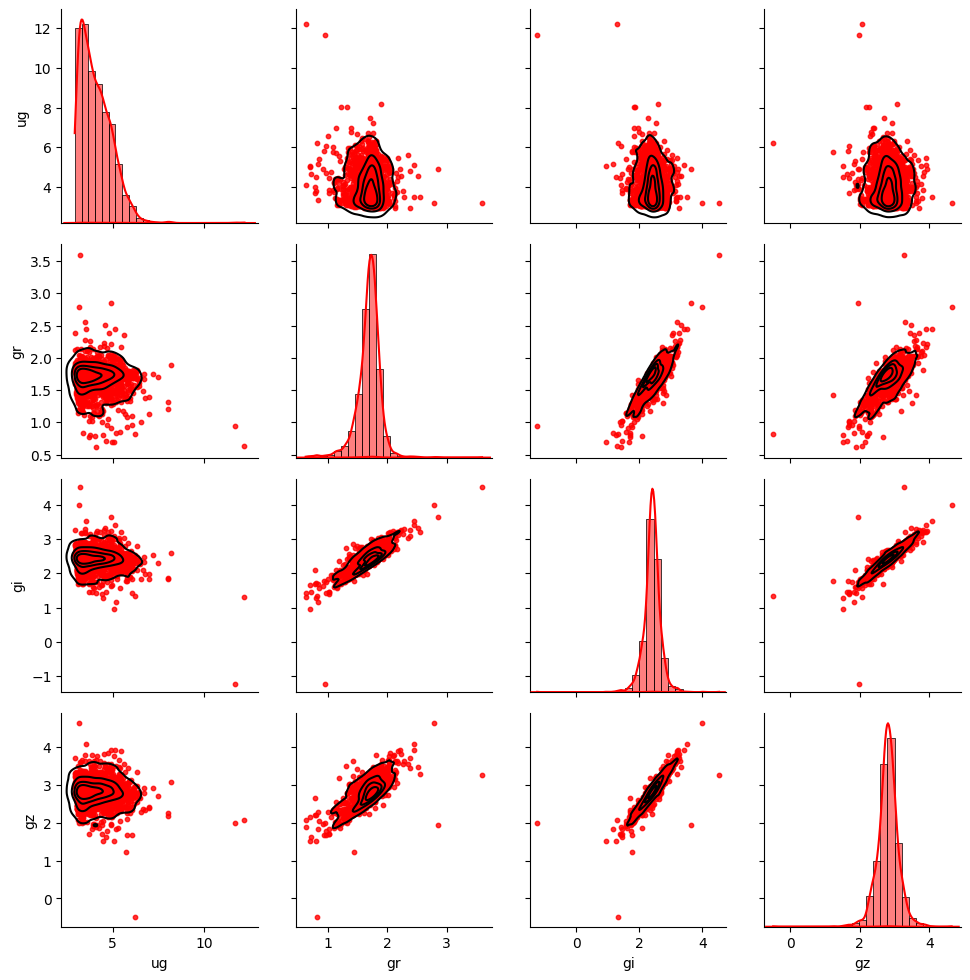

In [ ]:
# Second class of galaxies

C1 = sns.PairGrid(cluster1, diag_sharey=False)
C1.map_diag(sns.histplot, kde=True, color='red', bins=25)
C1.map_diag(sns.kdeplot, color='red')
C1.map_offdiag(plt.scatter, alpha=0.8, s=10, color='red')
C1.map_offdiag(sns.kdeplot, c='black', levels=5)
plt.show()

kde_ug1 = gaussian_kde(cluster1.ug)
kde_gr1 = gaussian_kde(cluster1.gr)
kde_gi1 = gaussian_kde(cluster1.gi)
kde_gz1 = gaussian_kde(cluster1.gz)

/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:1185: UserWarning: The following kwargs were not used by contour: 'c'
  cset = contour_func(
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:1185: UserWarning: The following kwargs were not used by contour: 'c'
  cset = contour_func(
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:1185: UserWarning: The following kwargs were not used by contour: 'c'
  cset = contour_func(
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:1185: UserWarning: The following kwargs were not used by contour: 'c'
  cset = contour_func(
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:1185: UserWarning: The following kwargs were not used by contour: 'c'
  cset = contour_func(
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:1185: UserWarning: The following kwargs were not used by contour: 'c'
  cset = contour_func(
/usr/local/lib/python3.10/dist-packages/seaborn/dist

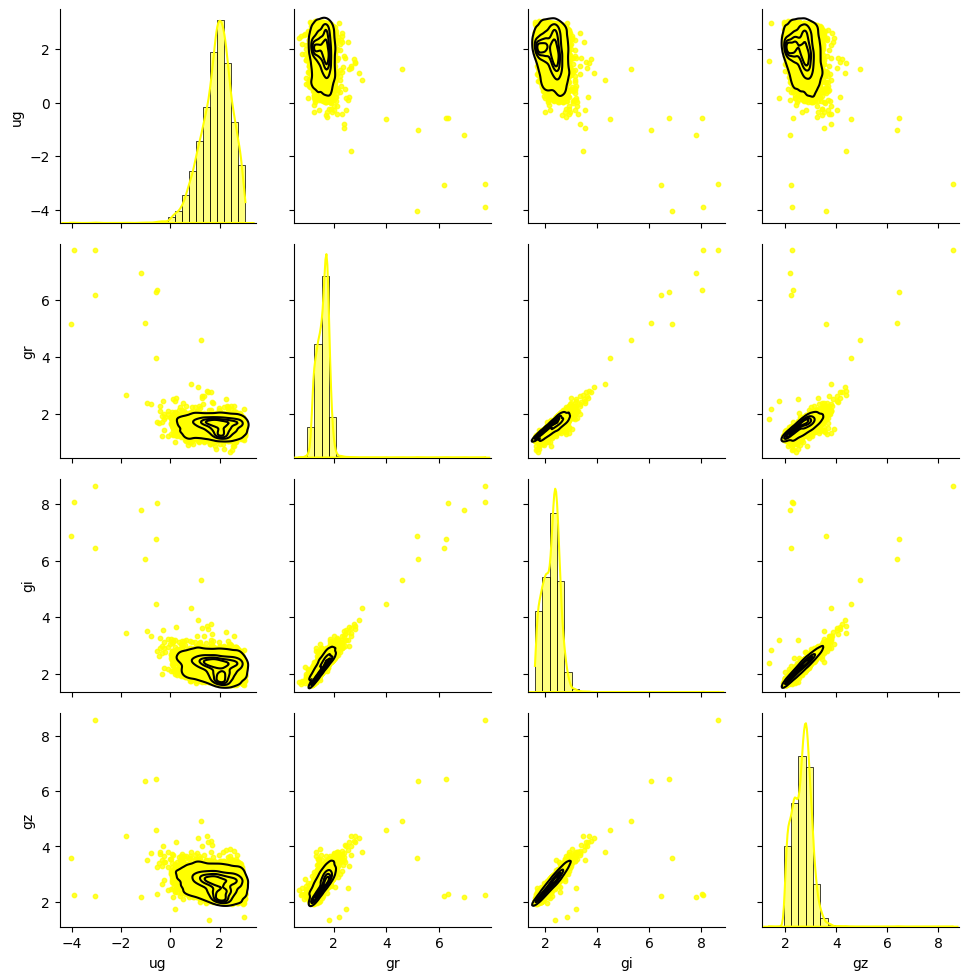

In [ ]:
# Final class of galaxies

C2 = sns.PairGrid(cluster2, diag_sharey=False)
C2.map_diag(sns.histplot, kde=True, color='yellow', bins=25)
C2.map_diag(sns.kdeplot, color='yellow')
C2.map_offdiag(plt.scatter, alpha=0.8, s=10, color='yellow')
C2.map_offdiag(sns.kdeplot, c='black', levels=5)
plt.show()

kde_ug2 = gaussian_kde(cluster2.ug)
kde_gr2 = gaussian_kde(cluster2.gr)
kde_gi2 = gaussian_kde(cluster2.gi)
kde_gz2 = gaussian_kde(cluster2.gz)

In [ ]:
# finally, compute mean + std for features compared to main stuff
# I don't have enough time to do this for every single feature in a coherent way,
# so I'm just going to do this math for the color differences (e.g. u-g etc.)

for n in ('ug', 'gr', 'gi', 'gz'):
    print(str(n) +  ':  Mean (c0) = ' + str(np.mean(cluster0[n]))+ ', Mean (c1) = ' + str(np.mean(cluster1[n])) + ', Mean (c2) = ' + str(np.mean(cluster2[n])) + ', Mean (total) = ' + str(np.mean(X[n])))

for n in ('ug', 'gr', 'gi', 'gz'):
    print(str(n) +  ':  Std (c0) = ' + str(np.std(cluster0[n]))+ ', Std (c1) = ' + str(np.std(cluster1[n])) + ', Std (c2) = ' + str(np.std(cluster2[n])) + ', Std (total) = ' + str(np.std(X[n])))

ug:  Mean (c0) = 1.550695305285135, Mean (c1) = 4.083641107549121, Mean (c2) = 1.8763233086100335, Mean (total) = 1.8930624107793057
gr:  Mean (c0) = 0.7912009049654859, Mean (c1) = 1.6900545492244055, Mean (c2) = 1.595210249632107, Mean (total) = 1.118584323104271
gi:  Mean (c0) = 1.1821149661339185, Mean (c1) = 2.4089261176835572, Mean (c2) = 2.2652111906354513, Mean (total) = 1.6246818889992998
gz:  Mean (c0) = 1.4549086261773714, Mean (c1) = 2.809948098086867, Mean (c2) = 2.6558871653846152, Mean (total) = 1.9451315709229344
ug:  Std (c0) = 0.42930154395254727, Std (c1) = 0.8656059901513813, Std (c2) = 0.6269275135592757, Std (total) = 0.9145476868212673
gr:  Std (c0) = 0.23905185111447927, Std (c1) = 0.20036500562118836, Std (c2) = 0.2910815553099395, Std (total) = 0.47753044348959206
gi:  Std (c0) = 0.31185016851572483, Std (c1) = 0.2745800010456148, Std (c2) = 0.3670592231671674, Std (total) = 0.6378680999093385
gz:  Std (c0) = 0.42220891315515496, Std (c1) = 0.30723280057262603

### Q2. Gaussian Processes + Emcee

There are many sources with periodic light curves that are not strictly sinusoidal. Thus, the use of the cosine kernel (on its own) may not be sufficient to model the signal. The quasi-periodic kernel: 

$$K_{ij} = k(x_i - x_j) = A \exp \left(-\Gamma \sin^2\left[\frac{\pi}{P} \left|x_i - x_j\right|\right]\right)$$

is useful for non-sinusoidal signals. It is implemented in the `george` package. Note that the parameters in the kernel aren't the only parameters you might need... look back on your previous homework assignments and think about what I'm glossing over here. 

I've given you an example light curve file with a decidedly non-sinusoidal, periodic signal from the ASAS-SN project from our colleagues at OSU. 

### 2a - Implement the model  (11 pts)

Examine this data, filter it as you see fit (I've included the file header in full - I'd pick one aperture, and look at the grades and notes about separate datasets). You can make tradeoffs here - more data that is potentially messier, vs less data so weaker constraints, but cleaner. Pick something that you can justify (and if you're struggling at 2c, examine this choice before twiddling with emcee). 

Write down a model for it with the likelihood function, an appropriate prior and posterior.

You may wish to look at the `george` documentation again, particularly how some parameters are better log transformed if the expectation is that they are positive real values. 

https://george.readthedocs.io/en/latest/tutorials/model/

In [1]:
!pip install george
import george
from george import kernels, GP

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 15.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for george: filename=george-0.4.0-cp310-cp310-linux_x86_64.whl size=347809 sha256=c1b0f2b48fc61dff3759ef624ea2c163a42734f1f2f85ff557c5cc34030fd02c
  Stored in directory: /root/.cache/pip/wheels/63/02/e3/24f2361717de09616769d97ed5854b4703d4df49fb1a3a1131
Successfully built george


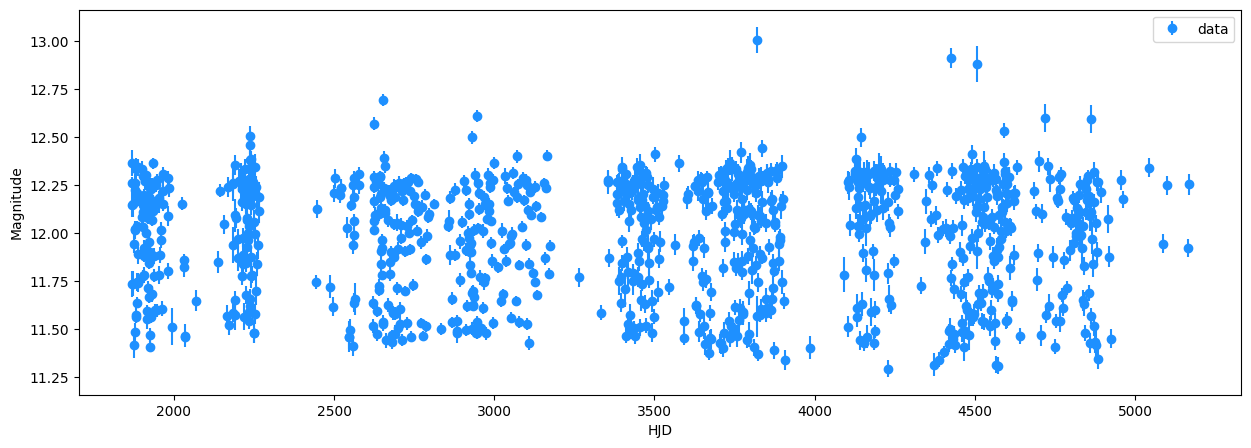

In [19]:
data = pd.read_table('asas_data.dat', delimiter='\s+', header=None, comment='#', names=['HJD', 'MAG_1', 'MAG_0',  
                                                                                          'MAG_2', 'MAG_3', 'MAG_4',
                                                                                          'MER_1', 'MER_0', 'MER_2', 
                                                                                          'MER_3', 'MER_4', 'GRADE', 'FRAME'])
# Only taking the A-rated data, as there are only ~150 more B-rated datapoints

data = data[(data['GRADE'] == 'A')]

# Let's take the 1st aperture. Why not

plt.figure(figsize=[15,5])
plt.errorbar(data.HJD, data.MAG_1, yerr=data.MER_1, linestyle='', marker='o', label='data', color='dodgerblue')
plt.xlabel('HJD')
plt.ylabel('Magnitude')
plt.legend()
plt.show()

In [24]:
def kernel(A, gamma, logP, lam):
    return A*kernels.ExpSine2Kernel(gamma=gamma, log_period=logP)*kernels.ExpSquaredKernel(metric=lam) # taken directly from homework 6 solution


# I ran out of time to finish this final (Python env was not working until Thursday and I am) 
# currently in Berlin) but here is where I would decide on the log_priors (would probably 
# take them from the data itself, just as was done in HW6 solution, and then do something like

def priors(m, A, gamma, logP, lam):
  
    priors_m = [0,1] # replace this with chosen bounds
    priors_A = [0,1] # replace this with chosen bounds
    priors_gamma = [0,1] # replace with chosen bounds
    priors_logP = [0,1] # replace with chosen bounds
    priors_lam = [0,1] # replace with chosen bounds

def lnprob(p):
    model.set_parameter_vector(p)
    return model.log_likelihood(y, quiet=True) + log_prior(p)

# to get the log-likelihood, again just as was done in HW6 solution

### 2b - Initial Guesses (11 pts)

Make some initial guess for the parameters. For the period, use Lomb-Scargle to find the top three periods for this light curve. Initialize 1/3rd of the walkers to each of the top three periods

Do the burn in with `emcee` - a 100 walkers and a 1000 steps should be plenty - you should find that the walkers have migrated away from the starting guess. Plot the chains. 

Make a plot of the log of the Posterior vs the log of the Period - select the periods with the highest log Posterior and change the initial guess for the Period of all the walkers to be in a small region around the Period with the highest log Posterior. 

Top three periods: [1.54783871 1.54769343 2.80416626]


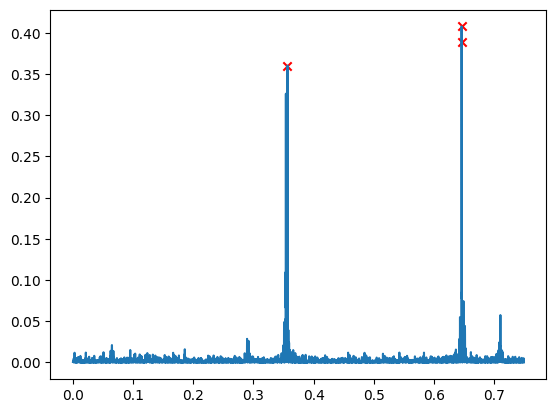

In [38]:
from astropy.timeseries import LombScargle

frequency, power = LombScargle(data['HJD'], data['MAG_1']).autopower()
peaks = []

plt.plot(frequency, power)

index1 = np.argmax(power)
peaks.append(power[index1])
power[index1] = 0

index2 = np.argmax(power)
peaks.append(power[index2])
power[index2] = 0

index3 = np.argmax(power)
peaks.append(power[index3])
power[index3] = 0

periods = (1/frequency)[[index1, index2, index3]]
print("Top three periods:", periods)

plt.scatter((1/periods), peaks, color='red', marker='x')

In [ ]:
# so i have my periods and would initialize them from there, if i had more time
# sadly my python environment broke and i didn't think of a good solution until 
# thursday afternoon. i've basically done this whole final in the span of a day
# and i apologize if it seems that way.

nwalkers = 100
nsteps = 1000

# something something emcee.run_mcmc(nwalkers, nsteps, etc.)

### 2c - Infer the model parameters (11 pts)

Plot the chains, the corner plot, the folded lightcurve, the Gaussian process model given the median parameters, 10 other draws from the model and the uncertainty about the model. 


In [ ]:
import corner 

N.B. you should be a bit worried about "burn in" and how the walkers were initialized throughout. If you plan to use GPs to search for periods in your own work, I highly recommend you read Angus et al. 2018 on the GP periodogram. Angus et al. provide far more intelligent methods for initializing the MCMC than what is presented here. 

### Q3: PyMC (yes, that thing), hierarchical mixture models, and the mass-radius relation for small exoplanets

The mass-radius relation is a relationship between the radius $R$ of an exoplanet and its mass $M$. We usually call planets smaller than the Neptune size $(R < 4 R_{\oplus})$ small planets. In the Solar System, we don't have any planets between the Earth and Neptune sizes ($ 1-4 R_{\oplus}$), whereas in extrasolar systems, plenty of planets with radii in the range are observed. Thus, it's extremely intriguing to study the compositions of these planets and understand why we don't have one in the Solar System.

In this problem, you will work on one of the papers that one of our colloquium speakers brought up (this is why you should go to colloquium btw, because it'd have totally helped with this final exam to know the answer) - the mass-radius relation for small exoplanets around M-dwarfs. 

The paper is by [Luque et al., Science 377, 1211 (2022)](https://ui.adsabs.harvard.edu/abs/2022arXiv220903871L/abstract). We will reproduce some of their results using the PyMC.

In [ ]:
## Download the dataset from Luque et al. 2022
data = pd.read_csv("https://carmenes.caha.es/ext/tmp/TMP.csv")
data.head()

,ID,ID_Star,Star,AltName,Karmn,RA_J2000,DE_J2000,SpT,SpTnum,d_pc,...,eurho_gcm-3,edrho_gcm-3,Teq_K,euTeq_K,edTeq_K,TSM,ESM,Method,DiscoveryRef,ParameterRef
0,1,1,GJ 3053,LHS 1140,J00449-152,00:44:59.33,-15:16:17.5,M4.5 V,4.5,14.964,...,0.84,0.80,378.9,4.3,4.2,8.88,0.19,RV,Dit17,Dit17 Men19 Lil20
1,2,1,GJ 3053,LHS 1140,J00449-152,00:44:59.33,-15:16:17.5,M4.5 V,4.5,14.964,...,0.81,0.74,708.9,8.0,7.8,25.90,3.45,RV,Dit17,Dit17 Men19 Lil20
2,3,2,TOI-1468,LSPM J0106+1913,J01066+192,01:06:36.98,+19:13:33.2,M3 V,3.0,24.721,...,1.05,0.92,682.2,7.4,6.9,9.00,6.30,RV,Cha22,Cha22
3,4,2,TOI-1468,LSPM J0106+1913,J01066+192,01:06:36.98,+19:13:33.2,M3 V,3.0,24.721,...,0.21,0.19,337.5,3.7,3.4,59.00,NaN,RV,Cha22,Cha22
4,5,3,GJ 3090,TOI-177,NaN,01:21:45.39,-46:42:51.8,M2 V,2.0,22.454,...,0.52,0.45,693.0,18.0,18.0,221.00,NaN,RV,Alm22a,Alm22a


In [ ]:
## Lets extract mass and radius and their uncertainties from the data; both M and R are in Earth units 
M = data.M_Mterra
R = data.R_Rterra

err_M = (data.edM_Mterra+data.euM_Mterra)/2  # Assume the + and - errors on M and R are symmetric because lazy
err_R = (data.edR_Rterra+data.euR_Rterra)/2

ind = err_R < 1.
M = M[ind]
R = R[ind]
err_M = err_M[ind]
err_R = err_R[ind]

c=data['rho_gcm-3'][ind]

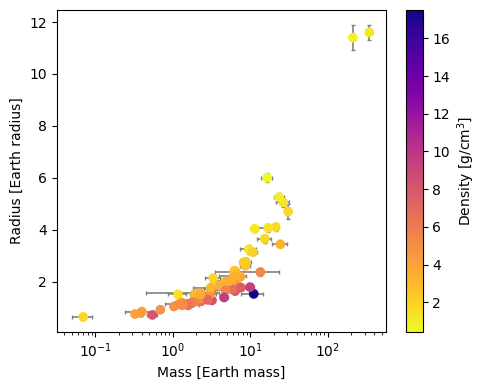

In [ ]:
## Plot the mass and radius of small planets around M-dwarfs
plt.figure(figsize=(5,4))
plt.errorbar(M, R, xerr=err_M, yerr=err_R,
             linestyle='', fmt='o', markersize=4, elinewidth=1.2, capsize=1.2, c='grey')
plt.scatter(M, R, c=c, zorder=100, cmap='plasma_r')
plt.xscale('log')
plt.xlabel('Mass [Earth mass]')
plt.ylabel('Radius [Earth radius]')
plt.colorbar(label=r'Density [g/cm$^3$]')
plt.tight_layout()
plt.show()

Exoplaneteers made up cute names to describe planets in different compositions.
- "Rocky world" if a planet has a bulk density similar to the Earth.
- "Water world" if a planet has a bulk density consistent with 50% rocky and 50% water ice.
- "Puffy world" if a planet has a bulk density smaller than the "Water World" density.

Now, while it's possible that this final is making you wish you were on a "puff" of something or the other, we'll restrict our analysis to the rocky and water worlds. It's where the grant dollars are. 


### 3a - modeling the mass radius relation for rocky worlds (11 pts) 

First, select the rocky worlds. 

Let's write down the mass-radius relation for rocky worlds as a power law.

$R = aM^b$, where $a$ is proportional to $1/\rho_{\oplus}$, and $b$ is unitless. If the relation follows $M = \frac{4}{3}\pi R^3 \rho$, we have $a = 1$ and $b = 1/3$. However, in reality, the interior density of planets is not uniform and depends on the equation of state.

Build a PyMC model to find parameters of interest {a, b}. Plot the traces (`pm` has a `plot_trace` function)and inferred model, along with some draws.

Hints:
- As a, b have to be positive, I'd suggest Uniform priors on log a, log b, and then using pm.Deterministic to exponentiate them 
- For the masses, since you've selected the rocky worlds, I'd suggest a normal distribution with the sample mean and sample standard deviation of the rocky worlds. 
- Given M, a, b you can use pm.Deterministic to get R_model
- Assume our favorite normal likelihood for R_model. You have the observed radius and their uncertainties from the file.

In [ ]:
c_rocky_ind = [i for i, j in enumerate(R) if (0.93 <= j <= 1.49)] # taken from the 1-sigma reported in paper
c_water_ind = [i for i, j in enumerate(R) if (1.69 <= j <= 2.5)]  # also taken from the paper, though i 
                                                                  # extended water bounds up for more data

Running on PyMC v5.1.2


array([[<Axes: title={'center': 'log_a'}>,
        <Axes: title={'center': 'log_a'}>],
       [<Axes: title={'center': 'log_b'}>,
        <Axes: title={'center': 'log_b'}>],
       [<Axes: title={'center': 'R_mod'}>,
        <Axes: title={'center': 'R_mod'}>]], dtype=object)

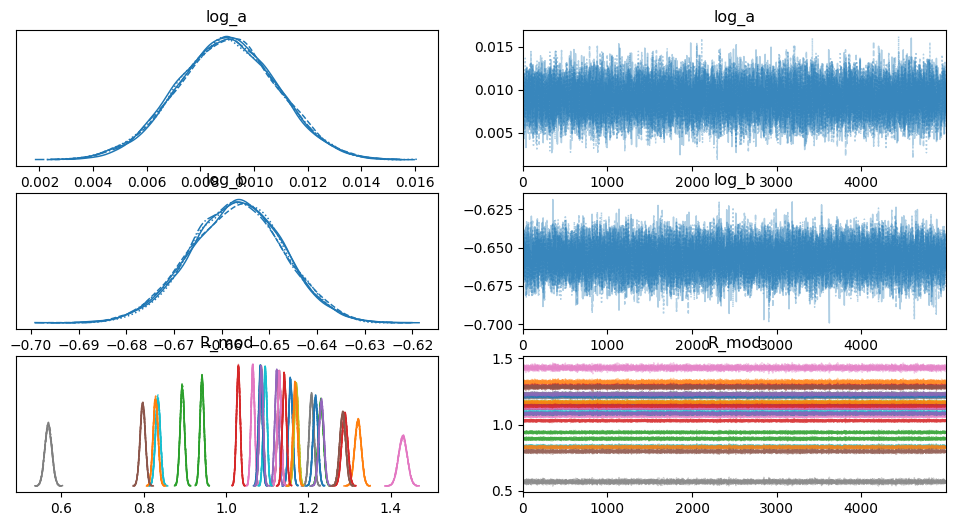

In [ ]:
import pymc as pm
print(f"Running on PyMC v{pm.__version__}") # added this when my env was not working lol 

# build a PyMC model to find parameters:

basic_model = pm.Model()

with basic_model:

    log_a = pm.Uniform('log_a', lower=-2, upper=2)
    log_b = pm.Uniform('log_b', lower=-2, upper=2)
    
    R_mod = pm.Deterministic('R_mod', (10 ** log_a) * M.values[c_rocky_ind] ** (10**log_b))
    R_obs = pm.Normal('R_obs', mu=R_mod, sigma=err_R[c_rocky_ind], observed=R.values[c_rocky_ind])

with basic_model:

    traces = pm.sample(5000, cores=5) 

# plot traces

pm.plot_trace(traces)


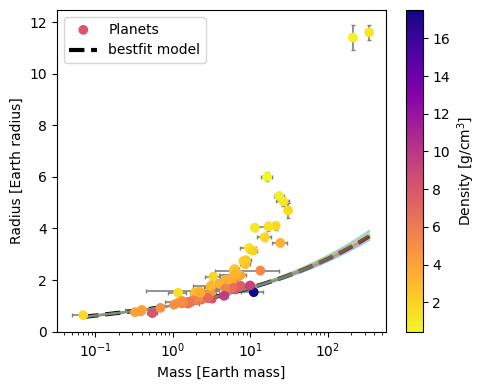

In [ ]:
# best inferred model

bestfit_loga = np.median(traces.posterior.log_a.values.flatten())
bestfit_logb = np.median(traces.posterior.log_b.values.flatten())
bestfit_a = 10**bestfit_loga
bestfit_b = 10**bestfit_logb

# 10 random draws

loga_samples = np.random.choice(traces.posterior.log_a.values.flatten(), size=10, replace=False)
logb_samples = np.random.choice(traces.posterior.log_b.values.flatten(), size=10, replace=False)

a_draws = 10**loga_samples
b_draws = 10**logb_samples

M_extent = np.linspace(np.min(M), np.max(M), 1000)

# now we plot

plt.figure(figsize=(5,4))
plt.errorbar(M, R, xerr=err_M, yerr=err_R,
             linestyle='', fmt='o', markersize=4, elinewidth=1.2, capsize=1.2, c='grey')
plt.scatter(M, R, c=c, zorder=100, cmap='plasma_r', label='Planets')
plt.plot(M_extent, bestfit_a * M_extent ** bestfit_b, color='black', linestyle='--', label='bestfit model', lw=3)

for a, b in zip(a_draws, b_draws):

    plt.plot(M_extent, a * M_extent ** b, alpha=0.3)

plt.xscale('log')
plt.xlabel('Mass [Earth mass]')
plt.ylabel('Radius [Earth radius]')
plt.colorbar(label=r'Density [g/cm$^3$]')
plt.tight_layout()
plt.legend()
plt.show()

### 3b - The Mass-Radius Relation for Rocky+Water Worlds (23 pts) 

Let's now add water worlds and model the mass-radius relation for both rocky and water worlds. Physically, it will require two models to describe the mass-radius relations for rocky and water worlds. The tricky part is we don't know exactly which kind of worlds a planet is belong to. In this situation, it is helpful to introduce a categorical variable `z` that is either 0 or 1, with the relative posterior probabilities telling us how Rocky/Watery a planet is.

Select the Rocky Water worlds - see the categories above 3a again. 

To make this work like magic with PyMC and it's Monte-Carlo sampler, we can choose a special prior for our categorial variable: the Drichlet Prior - https://en.wikipedia.org/wiki/Dirichlet_distribution

    # Two categories for water and rocky worlds
    p = pm.Dirichlet("p", a=np.ones(2), shape=2)
    z = pm.Categorical("z", p=p, shape=len(RockyWaterWorlds))
    

The rest of the PyMC model should be the same as 3a except you are fitting two relations - one for rocky worlds and one for water worlds, so you need two different `a` and `b` parameters - `shape=2` as above should take it. You might want to sort the `a` parameter with `transform=pm.distributions.transforms.ordered` when you define the prior to sort things. 

Build a PyMC model to find parameters of interest {a, b}. Plot the traces (`pm` has a `plot_trace` function)and inferred model, along with some draws.

/usr/local/lib/python3.10/dist-packages/arviz/stats/diagnostics.py:592: RuntimeWarning: invalid value encountered in double_scalars
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
ERROR:pymc:The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details
ERROR:pymc:There were 3628 divergences after tuning. Increase `target_accept` or reparameterize.


array([[<Axes: title={'center': 'z'}>, <Axes: title={'center': 'z'}>],
       [<Axes: title={'center': 'p'}>, <Axes: title={'center': 'p'}>],
       [<Axes: title={'center': 'log_a'}>,
        <Axes: title={'center': 'log_a'}>],
       [<Axes: title={'center': 'log_b'}>,
        <Axes: title={'center': 'log_b'}>],
       [<Axes: title={'center': 'a'}>, <Axes: title={'center': 'a'}>],
       [<Axes: title={'center': 'b'}>, <Axes: title={'center': 'b'}>],
       [<Axes: title={'center': 'R_mod'}>,
        <Axes: title={'center': 'R_mod'}>]], dtype=object)

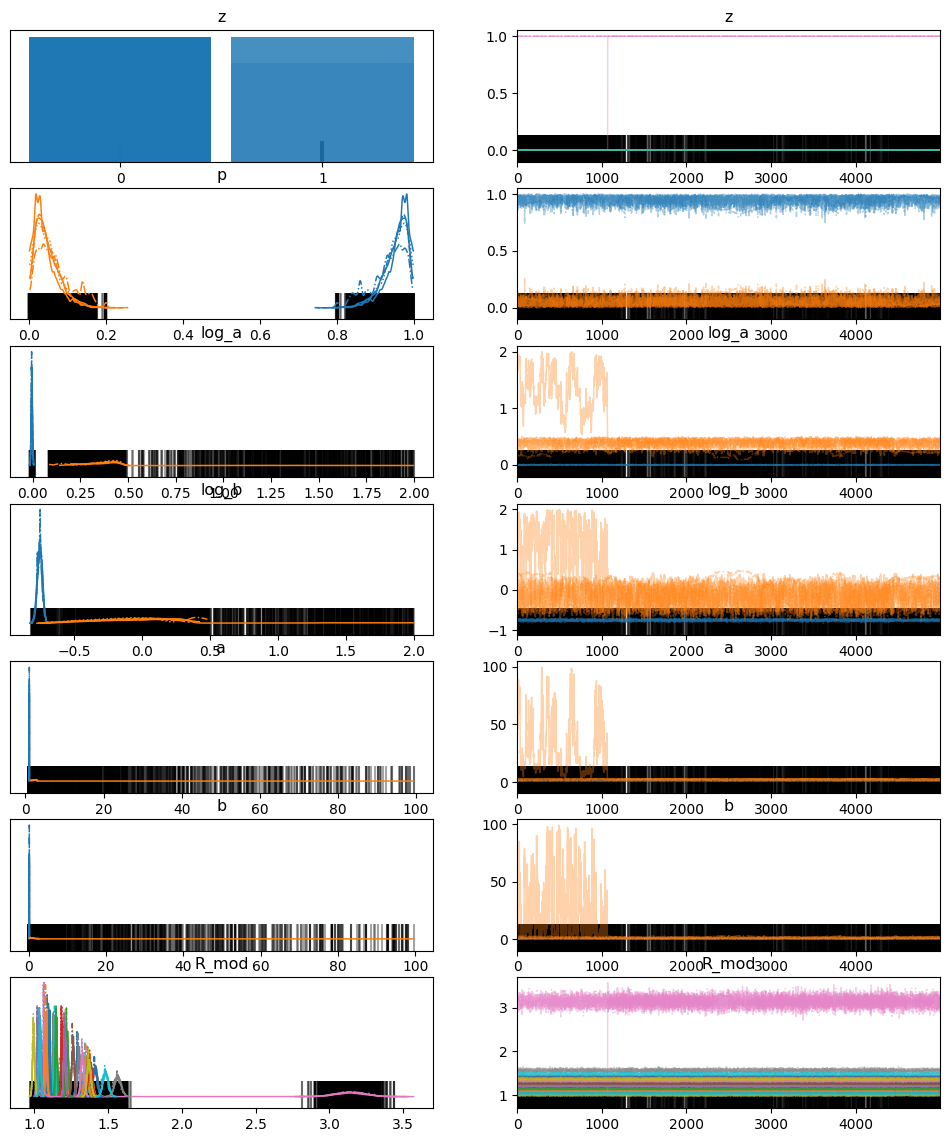

In [ ]:
# two-tiered model

import pymc as pm

better_model = pm.Model()
massies = M.values[c_rocky_ind + c_water_ind]

with better_model:

  # just copying what Gautham says to do here
    
    p = pm.Dirichlet("p", a=np.ones(2), shape=2)
    z = pm.Categorical("z", p=p, shape=len(massies))

  # we need two values for A, B to make this work, hence shape=2

    log_a = pm.Uniform('log_a',lower=-2, upper=2, shape=2, initval=[-1,1], transform=pm.distributions.transforms.univariate_ordered)
    log_b = pm.Uniform('log_b',lower=-2, upper=2, shape=2, initval=[-1,1], transform=pm.distributions.transforms.univariate_ordered)

    a = pm.Deterministic('a', 10**log_a)
    b = pm.Deterministic('b', 10**log_b)

  # we need a z * M, (1 - z) * M term such that if z=0, we get one type of planet, and if z=1, we get another 
    R_mod = pm.Deterministic('R_mod', a[0]*((1-z) * massies)**b[0] + a[1]*(z*massies)**b[1])

    R_obs = pm.Normal('R_obs', mu=R_mod, sigma=err_R[c_rocky_ind + c_water_ind], observed=R[c_rocky_ind + c_water_ind])

with better_model:

    new_traces = pm.sample(5000, cores=5) 

pm.plot_trace(new_traces)

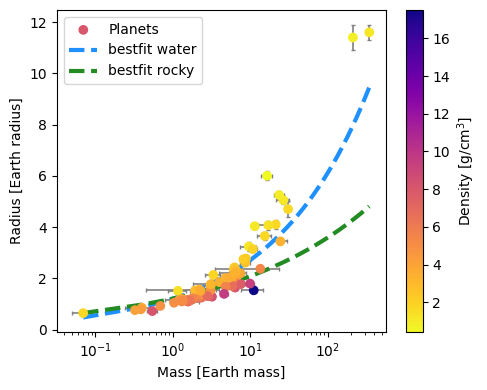

In [ ]:
# try to fit new model

bestfit_loga1 = np.median(new_traces.posterior.log_a[:,0].values.flatten())
bestfit_logb1 = np.median(new_traces.posterior.log_b[:,0].values.flatten())
bestfit_a1 = 10**bestfit_loga1
bestfit_b1 = 10**bestfit_logb1

bestfit_loga2 = np.median(new_traces.posterior.log_a[:,1].values.flatten())
bestfit_logb2 = np.median(new_traces.posterior.log_b[:,1].values.flatten())
bestfit_a2 = 10**bestfit_loga2
bestfit_b2 = 10**bestfit_logb2

#10 random draws

loga1_samples = np.random.choice(new_traces.posterior.log_a[:,0].values.flatten(), size=5, replace=False)
logb1_samples = np.random.choice(new_traces.posterior.log_b[:,0].values.flatten(), size=5, replace=False)

a1_draws = 10**loga1_samples
b1_draws = 10**logb1_samples

M_extent = np.linspace(np.min(M), np.max(M), 1000)

# now we plot

plt.figure(figsize=(5,4))
plt.errorbar(M, R, xerr=err_M, yerr=err_R,
             linestyle='', fmt='o', markersize=4, elinewidth=1.2, capsize=1.2, c='grey')
plt.scatter(M, R, c=c, zorder=100, cmap='plasma_r', label='Planets')
plt.plot(M_extent, bestfit_a1 * M_extent ** bestfit_b1, color='dodgerblue', linestyle='--', label='bestfit water', lw=3)
plt.plot(M_extent, bestfit_a2 * M_extent ** bestfit_b2, color='forestgreen', linestyle='--', label='bestfit rocky', lw=3)

# I will note now that I tried to get the draws to work, 
# but they just don't work ... unclear to me why, but oh well

for a, b in zip(a1_draws, b1_draws):
    plt.plot(M_extent, a * M_extent ** b, alpha=0.3)

plt.xscale('log')
plt.xlabel('Mass [Earth mass]')
plt.ylabel('Radius [Earth radius]')
plt.colorbar(label=r'Density [g/cm$^3$]')
plt.tight_layout()
plt.legend()
plt.show()

### Throughout, make sure your plots have things like appropriate axes scales, axes labels, errorsbars, legends, reasonable colors. Remember, these are how you tell the story of what you've done, and ultimately what we're looking at.  


### Get started. You know how to do all of this. If not, there's something in a class notebook that can help. I'm on Teams, so direct questions there. 

# Best of luck. You've got this. 